In [16]:
import dsgp4
import torch
%matplotlib inline
from dsgp4 import TLE

In [18]:
 tle_data = {
 "ISS": [
 "1 25544U 98067A   22325.59167824  .00016717  00000+0  30729-3 0  9993",
"2 25544  51.6431 226.7758 0005941 113.7952 246.3823 15.50087640370124"
],
 
 "Hubble": [
 "1 20580U 90037B   22326.14821306  .00001264  00000+0  60660-4 0  9991",
"2 20580  28.4692 341.3025 0002725  99.7240 260.4518 15.09257816345634",
 ],
 "Landsat 8": [
"1 39084U 13008A   22326.29217208  .00000068  00000+0  18063-4 0  9991",
"2 39084  98.2083 322.0110 0001335  90.0123 270.0100 14.57190296322473",
 ],
 
  "StarLink-32637": [
"1 62032U 24216A   24355.91667824  .00004160  00000+0  10686-3 0  9994",
"2 62032  42.9978 264.4632 0001924 273.7191  58.1736 15.40684592  5668",
 ]
 }
I_line1=tle_data["ISS"][0]
I_line2=tle_data["ISS"][1]
H_line1=tle_data["Hubble"][0]
H_line2=tle_data["Hubble"][1]
L_line1=tle_data["Landsat 8"][0]
L_line2=tle_data["Landsat 8"][1]
S_line1=tle_data["StarLink-32637"][0]
S_line2=tle_data["StarLink-32637"][1]
 




In [20]:
tle_I=dsgp4.TLE([I_line1,I_line2])
tle_H=dsgp4.TLE([H_line1,H_line2])
tle_L=dsgp4.TLE([L_line1,L_line2])
tle_S=dsgp4.TLE([S_line1,S_line2])

print(tle_I)
print(tle_H)
print(tle_L)
print(tle_S)



TLE(
1 25544U 98067A   22325.59167824  .00016717  00000+0  30729-3 0  9993
2 25544  51.6431 226.7758 0005941 113.7952 246.3823 15.50087640370124
)
TLE(
1 20580U 90037B   22326.14821306  .00001264  00000+0  60660-4 0  9991
2 20580  28.4692 341.3025 0002725  99.7240 260.4518 15.09257816345634
)
TLE(
1 39084U 13008A   22326.29217208  .00000068  00000+0  18063-4 0  9991
2 39084  98.2083 322.0110 0001335  90.0123 270.0100 14.57190296322473
)
TLE(
1 62032U 24216A   24355.91667824  .00004160  00000+0  10686-3 0  9994
2 62032  42.9978 264.4632 0001924 273.7191  58.1736 15.40684592  5668
)


In [22]:
import torch
import matplotlib.pyplot as plt
import dsgp4

#TLEs into a list
tles = [tle_I, tle_H, tle_L, tle_S]
tles_=[]
for tle in tles:
    tles_+=[tle]*20000
tsinces = torch.cat([torch.linspace(0,5*60,20000)]*len(tles))
#initializing them:
_,tle_batch=dsgp4.initialize_tle(tles_)


In [24]:
states_teme=dsgp4.propagate_batch(tle_batch,tsinces)
print(states_teme)

print(states_teme.shape)

tensor([[[-4.6540e+03, -4.9536e+03,  1.5360e+00],
         [ 3.4712e+00, -3.2447e+00,  6.0085e+00]],

        [[-4.6509e+03, -4.9566e+03,  6.9439e+00],
         [ 3.4765e+00, -3.2390e+00,  6.0085e+00]],

        [[-4.6478e+03, -4.9595e+03,  1.2352e+01],
         [ 3.4819e+00, -3.2333e+00,  6.0085e+00]],

        ...,

        [[ 3.1888e+03, -4.9146e+03,  3.4880e+03],
         [ 4.3422e+00,  5.2698e+00,  3.4469e+00]],

        [[ 3.1927e+03, -4.9099e+03,  3.4911e+03],
         [ 4.3386e+00,  5.2754e+00,  3.4429e+00]],

        [[ 3.1966e+03, -4.9051e+03,  3.4942e+03],
         [ 4.3350e+00,  5.2809e+00,  3.4389e+00]]])
torch.Size([80000, 2, 3])


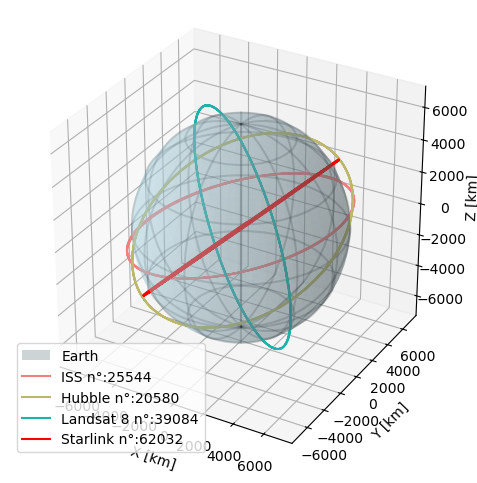

In [26]:
from matplotlib.image import imread

ax=dsgp4.plot_orbit(states_teme[:20000],
                    color='lightcoral',
                    label=f'ISS n°:{tles[0].satellite_catalog_number}')
ax=dsgp4.plot_orbit(states_teme[20000:40000],
                    ax=ax, 
                    color='darkkhaki', 
                    label=f'Hubble n°:{tles[1].satellite_catalog_number}')
ax=dsgp4.plot_orbit(states_teme[40000:60000],
                    ax=ax, 
                    color='lightseagreen', 
                    label=f'Landsat 8 n°:{tles[2].satellite_catalog_number}')
ax=dsgp4.plot_orbit(states_teme[60000:],
                    ax=ax, 
                    color='red',
                    label=f'Starlink n°:{tles[3].satellite_catalog_number}')


In [28]:
# Number of timesteps and satellites
import numpy as np
import pandas as pd
T = 20000
M = len(tles)  
states_teme = states_teme.view(M, T, 2, 3)


positions = states_teme[:, :, 0, :]

 #Extract x, y, z for the first TLE
x_tle1, y_tle1, z_tle1 = positions[0, :, 0], positions[0, :, 1], positions[0, :, 2]
x_tle2, y_tle2, z_tle2 = positions[1, :, 0], positions[1, :, 1], positions[1, :, 2]
x_tle3, y_tle3, z_tle3 = positions[2, :, 0], positions[2, :, 1], positions[2, :, 2]
x_tle4, y_tle4, z_tle4 = positions[3, :, 0], positions[3, :, 1], positions[3, :, 2]




In [30]:
import math
from datetime import datetime, timezone

def calculate_julian_date(dt):
    # Calculate Julian Date for the given datetime
    a = int((14 - dt.month) / 12)
    y = dt.year + 4800 - a
    m = dt.month + 12 * a - 3
    jd = dt.day + int((153 * m + 2) / 5) + 365 * y + int(y / 4) - int(y / 100) + int(y / 400) - 32045
    return jd + (dt.hour - 12) / 24 + dt.minute / 1440 + dt.second / 86400

def calculate_gmst(jd):
    # Calculate GMST in degrees
    jd0 = 2451545.0
    t = (jd - jd0) / 36525
    gmst0 = 280.46061837 + 360.98564736629 * (jd - jd0) + t**2 * (0.000387933 - t / 38710000)
    gmst0 = gmst0 % 360
    return gmst0

def calculate_gst(jd, ut):
    # Calculate GST
    gmst = calculate_gmst(jd)
    gst = gmst + (1.002737909 * ut)
    return gst % 360

# Example usage
now = datetime.now(timezone.utc)
jd = calculate_julian_date(now)
ut = now.hour + now.minute / 60 + now.second / 3600  # Universal Time in hours

gmst = calculate_gmst(jd)
gst = calculate_gst(jd, ut)

print(f"GMST: {gmst} degrees")
print(f"GST: {gst} degrees")


GMST: 317.7841780409217 degrees
GST: 332.3745716934878 degrees


In [32]:
deg_to_rad = np.pi / 180
def teme_to_eci(teme_coords, gst):
    gst_rad = gst * deg_to_rad
    rotation_matrix = np.array([
        [1, 0, 0],
        [0, np.cos(gst_rad), -np.sin(gst_rad)],
        [0, np.sin(gst_rad), np.cos(gst_rad)]
    ])
    eci_coords = np.dot(rotation_matrix, teme_coords)
    return eci_coords

# 5. ECI to ECEF Conversion Matrix (Rotation by GMST)
def eci_to_ecef(eci_coords, gmst):
    gmst_rad = gmst * deg_to_rad
    rotation_matrix = np.array([
        [np.cos(gmst_rad), np.sin(gmst_rad), 0],
        [-np.sin(gmst_rad), np.cos(gmst_rad), 0],
        [0, 0, 1]
    ])
    ecef_coords = np.dot(rotation_matrix, eci_coords)
    return ecef_coords
import math
import cartopy.crs as ccrs

# WGS84 Ellipsoid Constants (in kilometers)
a = 6378.137  # Semi-major axis
f = 1 / 298.257223563  # Flattening
e_squared = 2 * f - f**2  # Eccentricity squared

def ecef_to_geodetic(x, y, z):
    """
    Convert ECEF coordinates (km) to geodetic (latitude, longitude, height).
    """
    lon = np.arctan2(y, x)  # Longitude
    p = np.sqrt(x**2 + y**2)  # Distance to Z-axis
    lat = np.arctan2(z, p * (1 - e_squared))  # Initial guess for latitude
    
    # Iterative refinement of latitude
    for _ in range(1000):
        N = a / np.sqrt(1 - e_squared * np.sin(lat)**2)  # Radius of curvature
        h = p / np.cos(lat) - N  # Height above ellipsoid
        lat = np.arctan2(z + e_squared * N * np.sin(lat), p)
    
    # Convert to degrees
    lat_deg = np.degrees(lat)
    lon_deg = np.degrees(lon)
    return lat_deg, lon_deg, h




In [34]:
#gmst=150
#gst =100
teme_coords=[x_tle1, y_tle1, z_tle1]
eci_cords=teme_to_eci(teme_coords, gst)

print (eci_cords)
ecef_cords=eci_to_ecef(eci_cords, gmst)
e_x = ecef_cords[0, :]  # This will give you the first row (x-values)
e_y = ecef_cords[1, :]  # This will give you the second row (y-values)
e_z = ecef_cords[2, :]  # This will give you the third row (z-values)

print(f"X coordinates: {e_x}")
print(f"Y coordinates: {e_y}")
print(f"Z coordinates: {e_z}")
geo_cords = ecef_to_geodetic(e_x, e_y, e_z)
print(geo_cords)



[[-4654.04821922 -4650.9215664  -4647.79012416 ...  2448.1987291
   2453.33531784  2458.46937681]
 [-4388.2033004  -4388.28085469 -4388.35389005 ...  -635.57911347
   -631.2442123   -626.90866746]
 [ 2298.31119527  2304.45555171  2310.59753506 ...  6294.95266208
   6293.38533985  6291.81151435]]
X coordinates: [-498.33280178 -495.96503238 -493.59675223 ... 2240.24426017 2241.13578673
 2242.0250072 ]
Y coordinates: [-6377.15904233 -6375.1156039  -6373.06560054 ...  1174.28424217
  1180.94615574  1187.60684621]
Z coordinates: [2298.31119527 2304.45555171 2310.59753506 ... 6294.95266208 6293.38533985
 6291.81151435]
(array([19.87860127, 19.93394415, 19.98928458, ..., 68.23394587,
       68.19869941, 68.16336027]), array([-94.46820612, -94.44848104, -94.42874223, ...,  27.66248906,
        27.78658128,  27.91029251]), array([421.28266246, 421.28611766, 421.28959707, ..., 424.39085905,
       424.37846967, 424.36605813]))


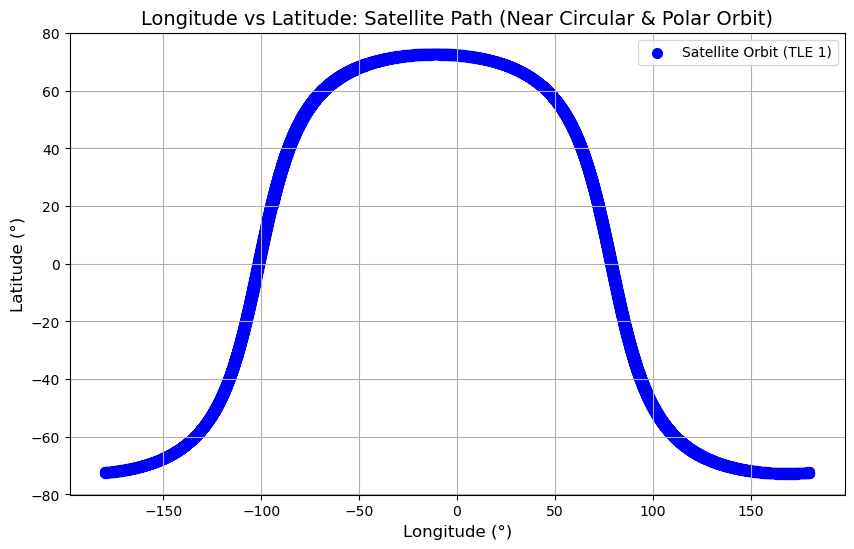

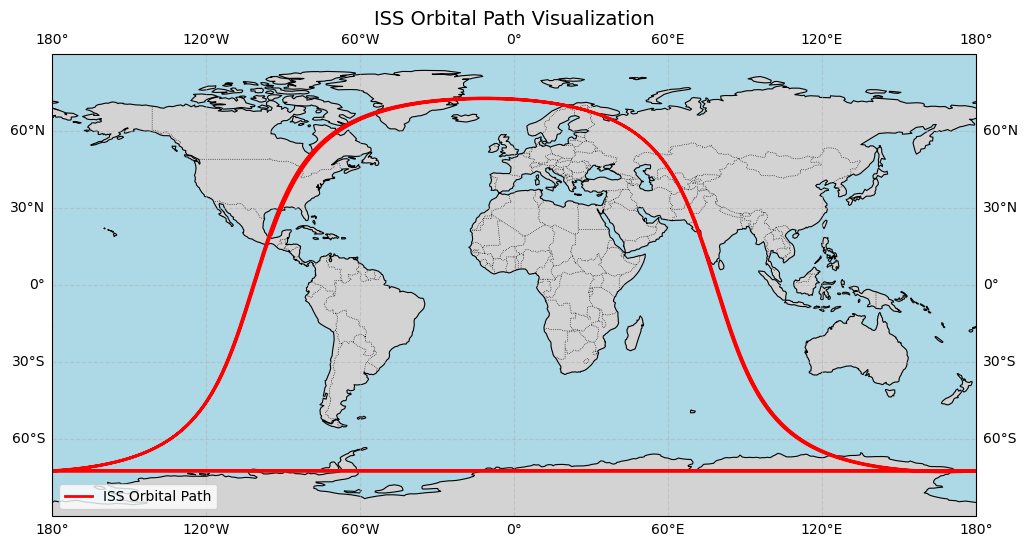

In [36]:

# Extract latitude and longitude directly from ECEF coordinates
latitudes = geo_cords[0]  # Latitude (degrees)
longitudes = geo_cords[1]  # Longitude (degrees)

# Plot Longitude vs Latitude
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, color='blue', label='Satellite Orbit (TLE 1)', linewidth=2)
plt.title("Longitude vs Latitude: Satellite Path (Near Circular & Polar Orbit)", fontsize=14)
plt.xlabel("Longitude (°)", fontsize=12)
plt.ylabel("Latitude (°)", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
# Set up the map with Stadia terrain background
ig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Add features to the map
ax.set_extent([-180, 180, -90, 90])  # Set global map extent
ax.add_feature(cfeature.LAND, facecolor='lightgray')  # Land
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')  # Ocean
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)  # Coastlines
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)  # Borders
ax.gridlines(draw_labels=True, linestyle="--", alpha=0.5)  # Add gridlines

# Plot the ISS orbital path
ax.plot(longitudes, latitudes, color='red', linewidth=2, transform=ccrs.PlateCarree(), label="ISS Orbital Path")
plt.legend(loc='lower left')
plt.title("ISS Orbital Path Visualization", fontsize=14)
plt.show()


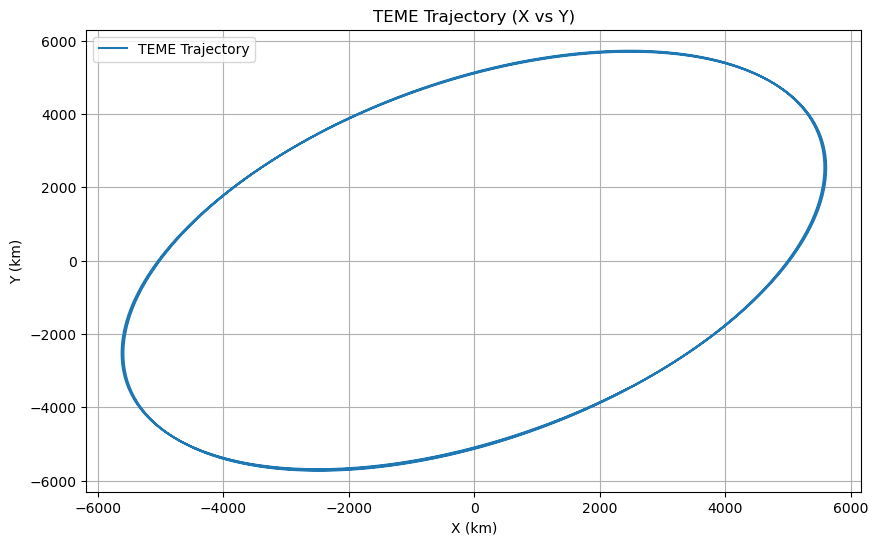

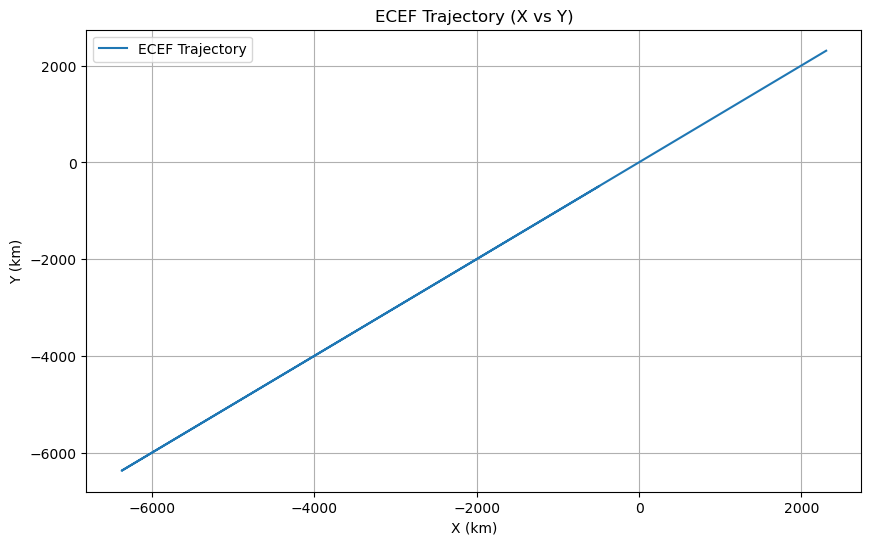

In [38]:
# Plot TEME Trajectory (X vs Y)
plt.figure(figsize=(10, 6))
plt.plot(x_tle1.numpy(), y_tle1.numpy(), label="TEME Trajectory")
plt.title("TEME Trajectory (X vs Y)")
plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.legend()
plt.grid()
plt.show()

# Plot ECEF Trajectory (X vs Y)
ecef_x, ecef_y, ecef_z = ecef_cords[:, 0], ecef_cords[:, 1], ecef_cords[:, 2]
plt.figure(figsize=(10, 6))
plt.plot(ecef_y, ecef_z, label="ECEF Trajectory")
plt.title("ECEF Trajectory (X vs Y)")
plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.legend()
plt.grid()
plt.show()


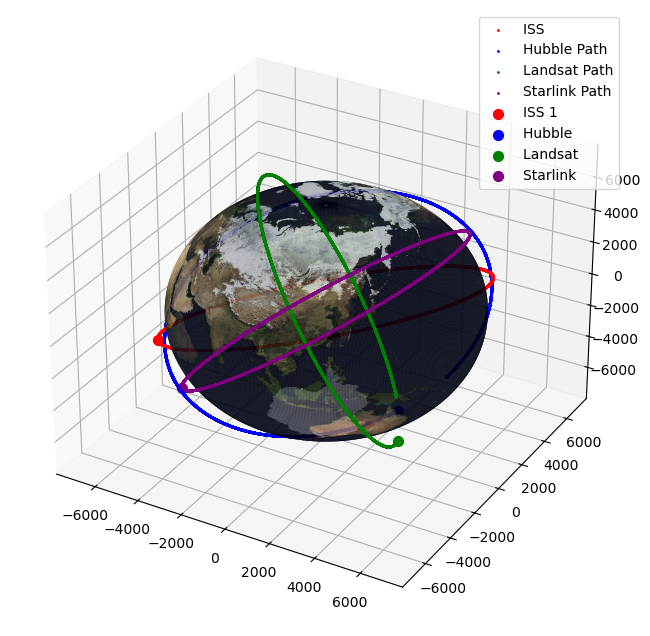

In [29]:
import numpy as np
from matplotlib.image import imread
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Load the Earth texture
earth_texture = imread(r"C:\Users\Reethika Prasanna\OneDrive\Dokumen\My Certifications\earth_texture.jpg")

# Create a sphere for the Earth
def create_earth_sphere(radius=6371, resolution=700):
    phi = np.linspace(0, np.pi, resolution)  # Latitude
    theta = np.linspace(0, 2 * np.pi, resolution)  # Longitude
    phi, theta = np.meshgrid(phi, theta)
    x = radius * np.sin(phi) * np.cos(theta)
    y = radius * np.sin(phi) * np.sin(theta)
    z = radius * np.cos(phi)
    u = theta / (2 * np.pi)  # Normalize longitude for texture mapping
    v = phi / np.pi  # Normalize latitude for texture mapping
    return x, y, z, u, v

# Generate the sphere coordinates and texture mapping
x, y, z, u, v = create_earth_sphere()
#satellite_positions=
# Map the texture onto the sphere
texture_shape = earth_texture.shape
facecolors = earth_texture[(v * (texture_shape[0] - 1)).astype(int), (u * (texture_shape[1] - 1)).astype(int)]

# Plot the Earth texture on the sphere
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(
    x, y, z, rstride=1, cstride=1, facecolors=facecolors / 255.0,
    linewidth=0, antialiased=True, shade=False
)


ax.scatter(x_tle1.numpy(), y_tle1.numpy(), z_tle1.numpy(), s=1,color='red',
           alpha=1, label='ISS ')
ax.scatter(x_tle2.numpy(), y_tle2.numpy(), z_tle2.numpy(),s=1 ,color='blue',
           alpha=1, label='Hubble Path')
ax.scatter(x_tle3.numpy(), y_tle3.numpy(), z_tle3.numpy(), s=1,color='green',
           alpha=1, label='Landsat Path')
ax.scatter(x_tle4.numpy(), y_tle4.numpy(), z_tle4.numpy(), s=1,color='purple',
           alpha=1, label='Starlink Path')
ax.scatter(x_tle1[-1], y_tle1[-1], z_tle1[-1], color='red', s=50, label='ISS 1')
ax.scatter(x_tle2[-1], y_tle2[-1], z_tle2[-1], color='blue', s=50, label='Hubble ')
ax.scatter(x_tle3[-1], y_tle3[-1], z_tle3[-1], color='green', s=50, label='Landsat ')
ax.scatter(x_tle4[-1], y_tle4[-1], z_tle4[-1], color='purple', s=50, label='Starlink ')

plt.legend()
plt.show()